In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')

In [5]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
df1=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')

In [7]:
df1

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
df2=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')

In [9]:
df2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
df3=pd.merge(df,df2,on=['Store','Date'])

In [11]:
df3.shape

(421570, 15)

In [12]:
df3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [13]:
df4=pd.merge(df3,df1,on='Store')

In [14]:
df4.shape

(421570, 17)

In [15]:
df4.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [16]:
df4.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


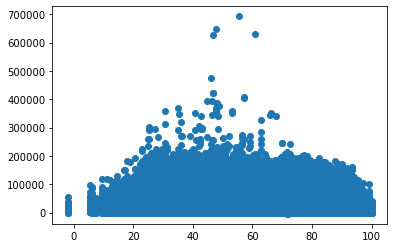

In [17]:
plt.scatter(df4['Temperature'],df4['Weekly_Sales'])
#no relation of temperature with weekly_sales

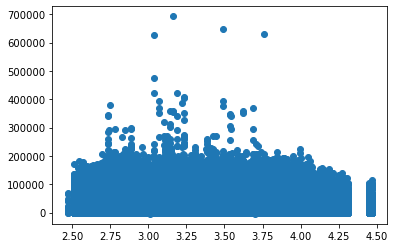

In [18]:
plt.scatter(df4['Fuel_Price'],df4['Weekly_Sales'])   #no relation of fuel price with weekly sales

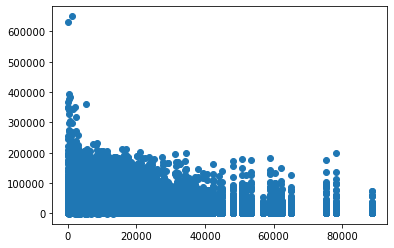

In [19]:
plt.scatter(df4['MarkDown1'],df4['Weekly_Sales'])

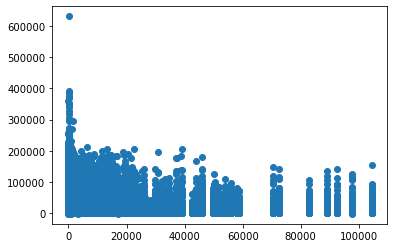

In [20]:
plt.scatter(df4['MarkDown2'],df4['Weekly_Sales'])

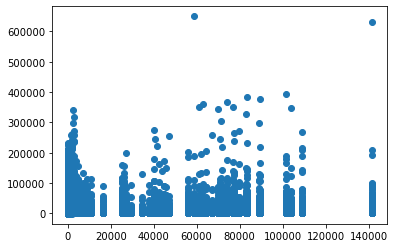

In [21]:
plt.scatter(df4['MarkDown3'],df4['Weekly_Sales'])

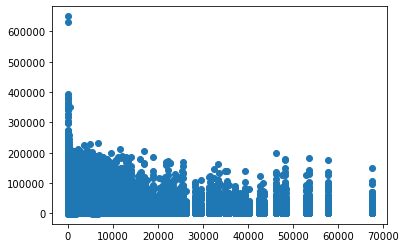

In [22]:
plt.scatter(df4['MarkDown4'],df4['Weekly_Sales'])

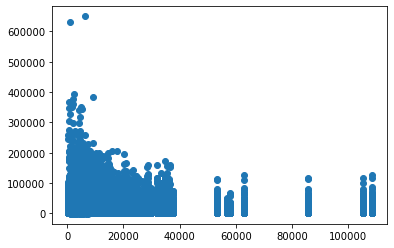

In [23]:
plt.scatter(df4['MarkDown5'],df4['Weekly_Sales'])

Text(0.5, 0, 'CPI')

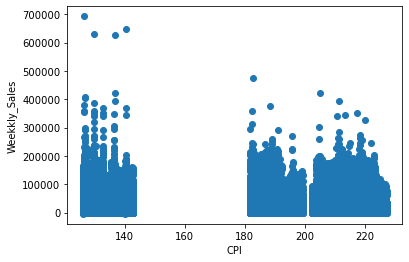

In [24]:
plt.scatter(df4['CPI'],df4['Weekly_Sales'])
plt.ylabel('Weekkly_Sales')
plt.xlabel('CPI')

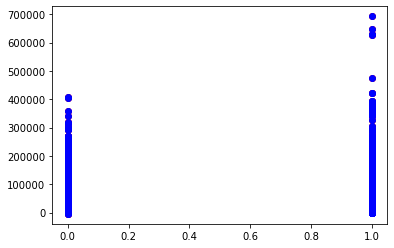

In [25]:
plt.scatter(df4['IsHoliday_x'],df4['Weekly_Sales'],c='red')
plt.scatter(df4['IsHoliday_y'],df4['Weekly_Sales'],c='blue')

In [26]:
df4.drop('IsHoliday_x',axis='columns',inplace=True)

In [27]:
df4

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [28]:
df4.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [29]:
df4['MarkDown1'].fillna(df4.MarkDown1.mean(),inplace=True)

In [30]:
df4.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [31]:
df4['MarkDown2'].fillna(df4.MarkDown2.mean(),inplace=True)

In [32]:
df4['MarkDown3'].fillna(df4.MarkDown3.mean(),inplace=True)

In [33]:
df4['MarkDown4'].fillna(df4.MarkDown4.mean(),inplace=True)

In [34]:
df4['MarkDown5'].fillna(df4.MarkDown5.mean(),inplace=True)

In [35]:
df4.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

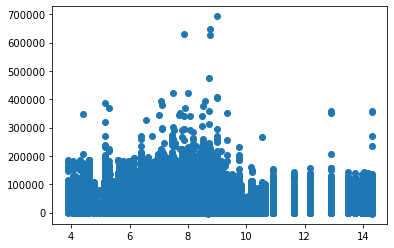

In [36]:
plt.scatter(df4['Unemployment'],df4['Weekly_Sales'])

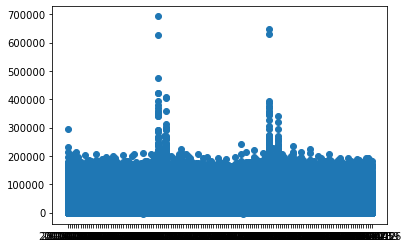

In [37]:
plt.scatter(df4['Date'],df4['Weekly_Sales'])

In [38]:
df4.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [39]:
df4.drop(['Temperature','Fuel_Price','IsHoliday_y','Unemployment'],inplace=True,axis=1)

In [40]:
df4

,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Type,Size
0,1,1,2010-02-05,24924.50,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,A,151315
1,1,2,2010-02-05,50605.27,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,A,151315
2,1,3,2010-02-05,13740.12,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,A,151315
3,1,4,2010-02-05,39954.04,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,A,151315
4,1,5,2010-02-05,32229.38,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,B,118221
421566,45,94,2012-10-26,5203.31,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,B,118221
421567,45,95,2012-10-26,56017.47,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,B,118221
421568,45,97,2012-10-26,6817.48,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,B,118221


In [41]:
df5=pd.get_dummies(df4,columns=['Type'],drop_first=True)

In [42]:
df5.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Size            0
Type_B          0
Type_C          0
dtype: int64

In [43]:
df5.Date.dtype

dtype('O')

In [44]:
df4.drop('Date',axis=1,inplace=True)

In [45]:
df5

,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Size,Type_B,Type_C
0,1,1,2010-02-05,24924.50,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,151315,0,0
1,1,2,2010-02-05,50605.27,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,151315,0,0
2,1,3,2010-02-05,13740.12,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,151315,0,0
3,1,4,2010-02-05,39954.04,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,151315,0,0
4,1,5,2010-02-05,32229.38,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,151315,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,118221,1,0
421566,45,94,2012-10-26,5203.31,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,118221,1,0
421567,45,95,2012-10-26,56017.47,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,118221,1,0
421568,45,97,2012-10-26,6817.48,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,118221,1,0


In [46]:
df5.drop(['Store'],axis=1,inplace=True)

In [47]:
X=df5[['Dept','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Size','Type_B','Type_C']]

In [48]:
Y=df5[['Weekly_Sales']]

**Feature Scaling**

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [50]:
X

array([[-1.41874236e+00,  8.25659954e-15, -1.19584597e-14, ...,
         2.39208954e-01, -7.95938056e-01, -3.35262803e-01],
       [-1.38594689e+00,  8.25659954e-15, -1.19584597e-14, ...,
         2.39208954e-01, -7.95938056e-01, -3.35262803e-01],
       [-1.35315142e+00,  8.25659954e-15, -1.19584597e-14, ...,
         2.39208954e-01, -7.95938056e-01, -3.35262803e-01],
       ...,
       [ 1.66403164e+00, -6.51112685e-01, -6.73149791e-01, ...,
        -3.03489024e-01,  1.25637918e+00, -3.35262803e-01],
       [ 1.72962258e+00, -6.51112685e-01, -6.73149791e-01, ...,
        -3.03489024e-01,  1.25637918e+00, -3.35262803e-01],
       [ 1.76241805e+00, -6.51112685e-01, -6.73149791e-01, ...,
        -3.03489024e-01,  1.25637918e+00, -3.35262803e-01]])

In [51]:
Y

,Weekly_Sales
0,24924.50
1,50605.27
2,13740.12
3,39954.04
4,32229.38
...,...
421565,2487.80
421566,5203.31
421567,56017.47
421568,6817.48


**Model Creation**

In [60]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = lin_regressor.predict(X_test)

In [64]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 475242869.24974173


In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X,Y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [70]:
y_pred=regressor.predict(X_test)


In [71]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 5789008.834229435
